### Data Setup for Modelling

Below is the default directory where all the models that will be trained are stored.

In [1]:
model_dir = "./final"

The below line ensures that everything is plotted in the notebook.

In [2]:
%matplotlib inline

Imports used.

In [14]:
import cv2

In [3]:
from fastai import *
from fastai.vision import *
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
path = './data/'
path_train = path + 'train_images'
path_test = path + 'test_images'

In [40]:
import os
count = 0
for path in os.listdir(path_train):
  if os.path.isfile(os.path.join(path_train, path)):
    count += 1
print("Number of files in train set: {0}".format(count))

Number of files in train set: 3662


In [5]:
tfms = get_transforms(flip_vert=True, max_rotate=360, max_warp=0, max_zoom=1.1,
                     max_lighting=0.3)

In [6]:
src = (ImageList.from_csv(path, 'train.csv', folder='train_images',
                          suffix='.png')
        .split_by_rand_pct(0.2)
        .label_from_df(cols=1))

### Functions used for Training

In [7]:
def get_data(sz, bs):
    return (src.transform(tfms, size=sz)
               .databunch(bs=bs)
               .normalize(imagenet_stats))

Below is the metric which will be used to score the model performance.

In [8]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [9]:
def get_learner(data):
    learn = cnn_learner(data, models.resnet50, metrics=[error_rate, 
                                               kappa]).to_fp16()
    learn.model_dir = model_dir
    return learn

<h3>Data visualization</h3>

In [27]:
data = get_data(512, 24)

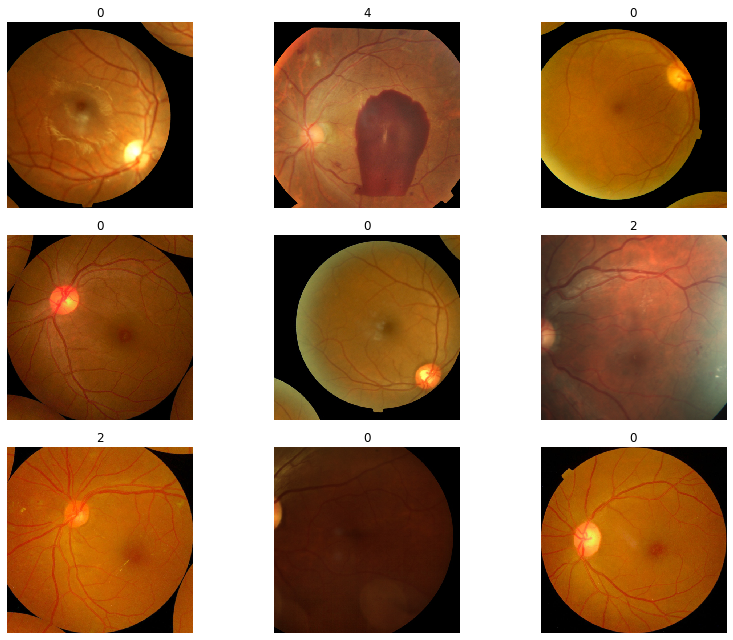

In [35]:
data.show_batch(3, figsize=(12, 9))

### Model Building

In [11]:
data = get_data(256, 64)
learn = get_learner(data)

In [12]:
learn.fit_one_cycle(6, slice(1e-2))
learn.save('r50_256_1')

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,1.285683,0.849943,0.263661,0.818226,05:59
1,0.985361,0.702917,0.232240,0.817030,05:56
2,0.822981,0.560698,0.204918,0.850819,05:51
3,0.687465,0.529272,0.202186,0.847326,05:46
4,0.616803,0.516903,0.206284,0.860920,05:49
5,0.548522,0.494962,0.198087,0.869651,05:40


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


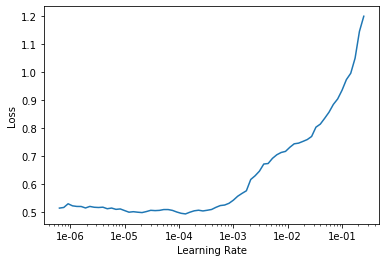

In [13]:
learn.load('r50_256_1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.load('r50_256_1')
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-5, 1e-3))
learn.save('r50_256_2')

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,0.508806,0.506271,0.188525,0.877773,05:57
1,0.505074,0.517756,0.202186,0.869621,06:17
2,0.491142,0.486585,0.196721,0.868299,06:15
3,0.439963,0.463614,0.181694,0.876150,06:18


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


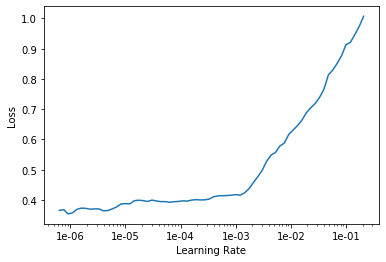

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
data = get_data(384, 32)
learn = get_learner(data)

epoch,train_loss,valid_loss,error_rate,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


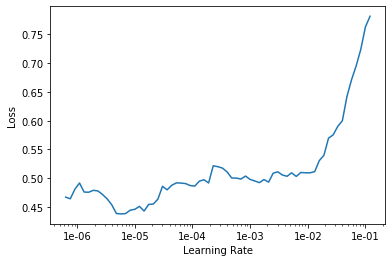

In [17]:
learn.load('r50_256_2')
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.freeze()
learn.fit_one_cycle(6, slice(1e-2/2))
learn.save('r50_384_1')

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,0.515522,0.561323,0.191257,0.861040,06:25
1,0.539000,0.520510,0.187158,0.889400,06:23
2,0.530217,0.479594,0.181694,0.898554,06:18
3,0.516513,0.455475,0.189891,0.897368,06:17
4,0.447848,0.432492,0.170765,0.908501,06:19
5,0.410241,0.418444,0.168033,0.901138,06:18


epoch,train_loss,valid_loss,error_rate,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


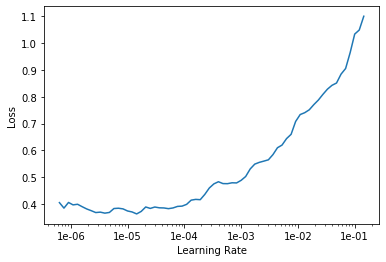

In [19]:
learn.load('r50_384_1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.load('r50_384_1')
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-6, 1e-3))
learn.save('r50_384_2')

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,0.438355,0.419818,0.169399,0.907451,06:41
1,0.414917,0.412466,0.158470,0.908730,06:27
2,0.388164,0.410571,0.155738,0.909154,06:18
3,0.345410,0.411134,0.157104,0.911993,06:04


In [11]:
data = get_data(512, 24)
learn = get_learner(data)

epoch,train_loss,valid_loss,error_rate,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


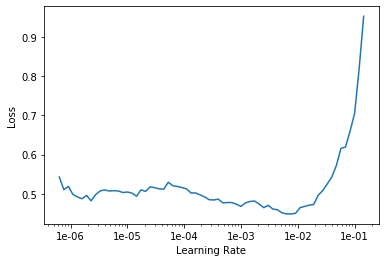

In [13]:
learn.load('r50_384_2')
learn.freeze()
learn.lr_find()
learn.recorder.plot()          

In [15]:
learn.load('r50_384_2')
learn.freeze()
learn.fit_one_cycle(6, slice(1e-2/2))
learn.save('r50-512-1')

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,0.446242,0.288206,0.099727,0.948801,06:38
1,0.538675,0.389008,0.142077,0.917028,06:36
2,0.458331,0.360792,0.131148,0.924314,06:37
3,0.444905,0.308138,0.110656,0.934962,06:37
4,0.394485,0.286455,0.103825,0.940524,06:37
5,0.383079,0.290383,0.106557,0.933764,06:38


epoch,train_loss,valid_loss,error_rate,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


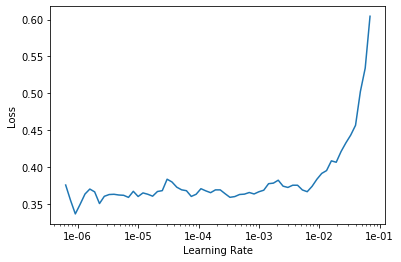

In [12]:
learn.load('r50-512-1')
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.load('r50-512-1')
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-6/3, 1e-3))
learn.save('r50-512-2')

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,0.412542,0.298928,0.095628,0.939896,07:14
1,0.393476,0.320773,0.116120,0.922084,06:33
2,0.366902,0.313835,0.095628,0.942670,06:30
3,0.323737,0.307297,0.103825,0.941719,06:55


### Model Interpretation

In [36]:
learn.load('r50-512-2')
interp = ClassificationInterpretation.from_learner(learn)

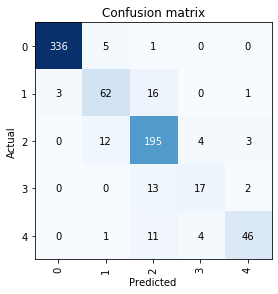

In [37]:
interp.plot_confusion_matrix()

In [43]:
valid_set_no = 3662*0.2
wrong_percent = (9/valid_set_no)*100
print(wrong_percent)

1.228836701256144


In [1]:
3662*0.2

732.4000000000001